In [7]:
import os
from PIL import Image
import itertools

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

print('Modules Loaded')

Modules Loaded


In [8]:
train_data_path = 'C:\\Users\\KIIT\\Downloads\\archive (1)\\chest_xray\\train'
filepaths = []
labels = []

folds = os.listdir(train_data_path)
for fold in folds:
    foldpath = os.path.join(train_data_path, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

df = pd.concat([FSeries, LSeries], axis=1)

In [9]:
df

,filepaths,label
0,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
1,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
2,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
3,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
4,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
...,...,...
5211,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA
5212,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA
5213,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA
5214,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA


In [10]:
valid_data_dir = 'C:\\Users\\KIIT\\Downloads\\archive (1)\\chest_xray\\val'

filepaths = []
labels = []

folds = os.listdir(valid_data_dir)
for fold in folds:
    foldpath = os.path.join(valid_data_dir, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

valid = pd.concat([FSeries, LSeries], axis=1)


In [11]:
valid

,filepaths,label
0,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
1,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
2,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
3,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
4,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
5,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
6,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
7,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
8,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA
9,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA


#Processing Test Dataset

In [13]:
test_data_dir = 'C:\\Users\\KIIT\\Downloads\\archive (1)\\chest_xray\\test'

filepaths = []
labels = []

folds = os.listdir(test_data_dir)

for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

test = pd.concat([FSeries, LSeries], axis=1)

In [14]:
test

,filepaths,label
0,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
1,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
2,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
3,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
4,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,NORMAL
...,...,...
619,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA
620,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA
621,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA
622,C:\Users\KIIT\Downloads\archive (1)\chest_xray...,PNEUMONIA


#Spliting Data Into Train, Valid, Test

In [16]:
train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=42)

#ImageDataGenerator

In [28]:
# crobed image size
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
val_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = val_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 4172 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.


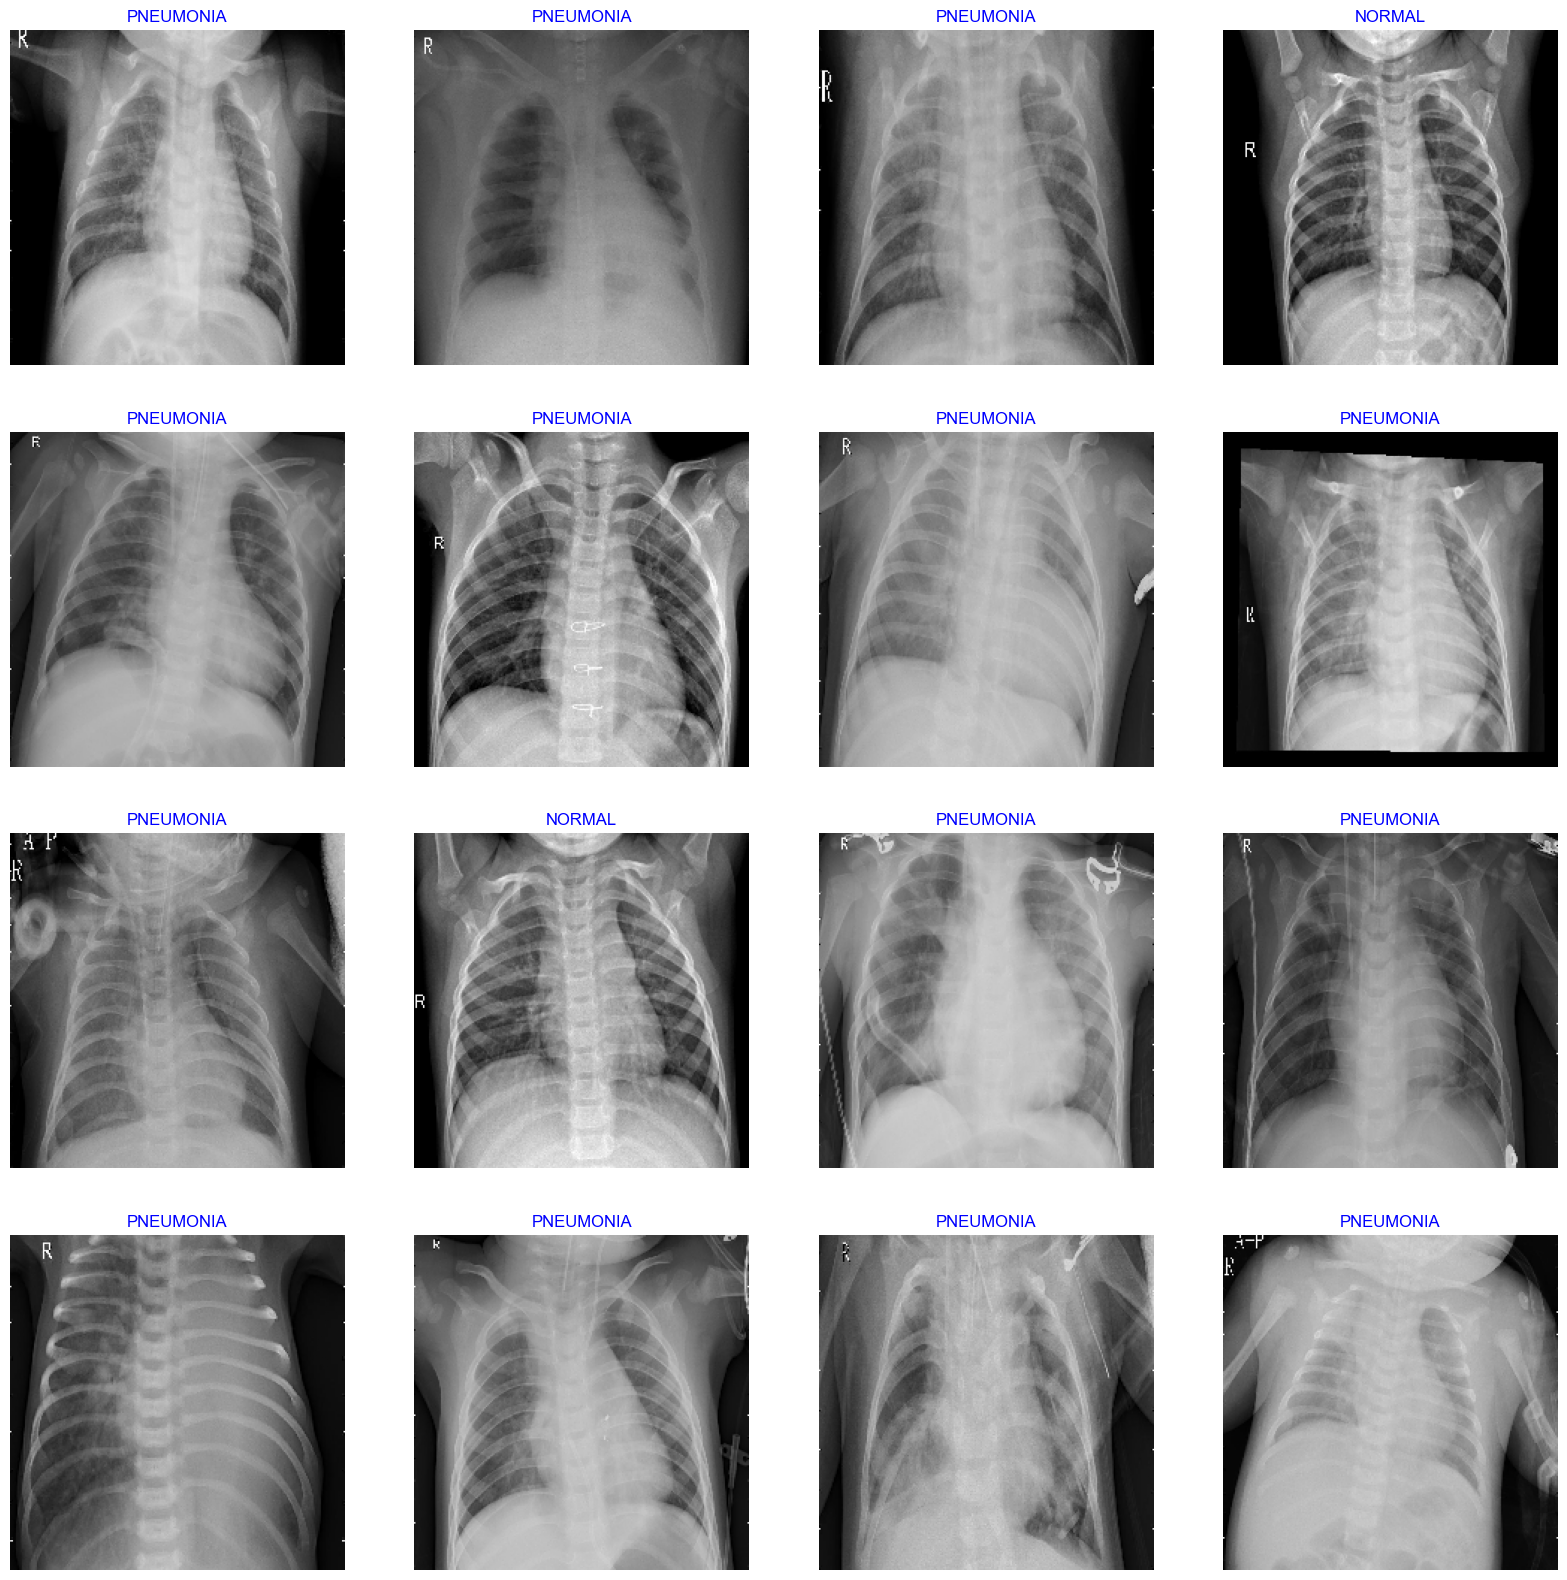

In [30]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

In [32]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,050 (80.70 MB)

 Trainable params: 21,154,050 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
epochs = 13   # number of all epochs in training

history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 2917s 11s/step - accuracy: 0.7522 - loss: 11.2225 - val_accuracy: 0.8774 - val_loss: 0.2942
Epoch 2/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 3002s 12s/step - accuracy: 0.8902 - loss: 0.2558 - val_accuracy: 0.9042 - val_loss: 0.2118
Epoch 3/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 2927s 11s/step - accuracy: 0.9142 - loss: 0.1931 - val_accuracy: 0.9444 - val_loss: 0.1642
Epoch 4/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 2713s 10s/step - accuracy: 0.9586 - loss: 0.1327 - val_accuracy: 0.9617 - val_loss: 0.1492
Epoch 5/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 2792s 11s/step - accuracy: 0.9717 - loss: 0.0881 - val_accuracy: 0.9330 - val_loss: 0.1614
Epoch 6/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 2991s 11s/step - accuracy: 0.9685 - loss: 0.0795 - val_accuracy: 0.9598 - val_loss: 0.1040
Epoch 7/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 3001s 11s/step - accuracy: 0.9775 - loss: 0.0599 - val_accuracy: 0.9330 - val_loss: 0.2302
Epoch 8/13
261/261 ━━━━━━━━━━━━━━━━━━━━ 2983s 11s/step - accuracy: 0.9795 - loss: 

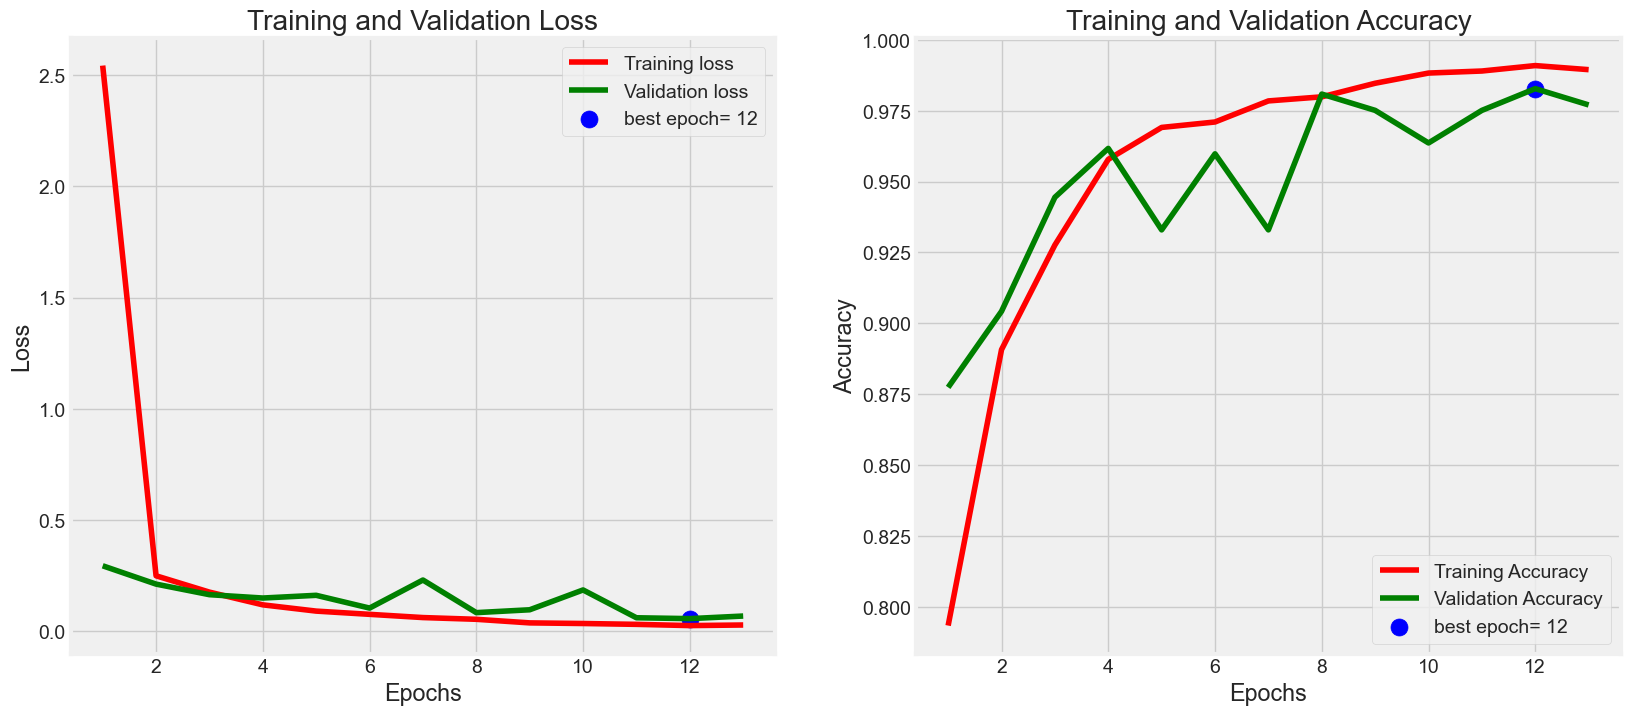

In [36]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [38]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

261/261 ━━━━━━━━━━━━━━━━━━━━ 847s 3s/step - accuracy: 0.9930 - loss: 0.0167
33/33 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9779 - loss: 0.0768
33/33 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9751 - loss: 0.0514
Train Loss:  0.012997464276850224
Train Accuracy:  0.9952061176300049
--------------------
Validation Loss:  0.06828036904335022
Validation Accuracy:  0.977011501789093
--------------------
Test Loss:  0.07006801664829254
Test Accuracy:  0.9731800556182861


In [45]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1) 

33/33 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step


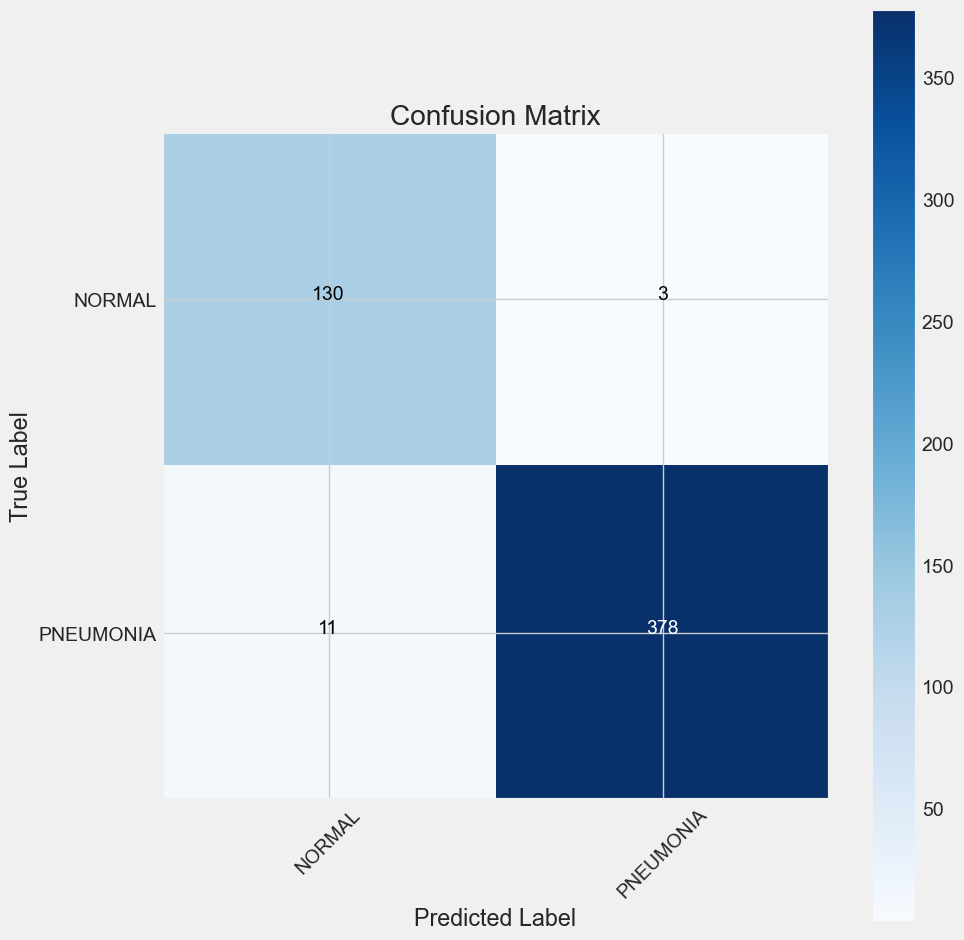

In [49]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.92      0.98      0.95       133
   PNEUMONIA       0.99      0.97      0.98       389

    accuracy                           0.97       522
   macro avg       0.96      0.97      0.97       522
weighted avg       0.97      0.97      0.97       522



In [57]:
model.save("Pneumonia Detection.keras")